# Credit card fraud detection

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

### Import data

In [3]:
df_train=pd.read_csv("fraudTrain.csv")
df_test=pd.read_csv("fraudTest.csv")

In [4]:
df_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

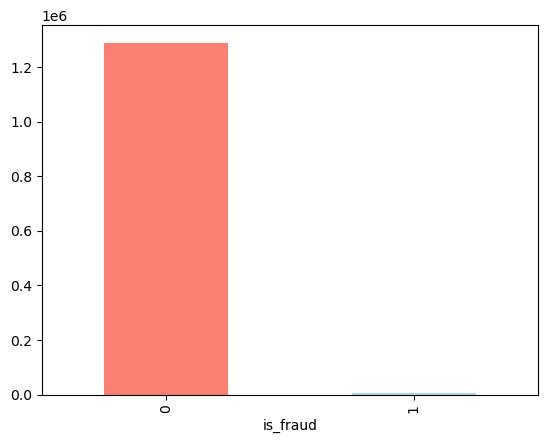

In [11]:
df_train['is_fraud'].value_counts().plot(kind='bar',color=['salmon','lightblue']);


### convert strings to categories

In [12]:
#find the columns which contains strings
for label,content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

trans_date_trans_time
merchant
category
first
last
gender
street
city
state
job
dob
trans_num


In [13]:
# This will turn all the strings into category value
for label,content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label]=content.astype("category").cat.as_ordered()

In [39]:
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype("category").cat.as_ordered()

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   Unnamed: 0             1296675 non-null  int64   
 1   trans_date_trans_time  1296675 non-null  category
 2   cc_num                 1296675 non-null  int64   
 3   merchant               1296675 non-null  category
 4   category               1296675 non-null  category
 5   amt                    1296675 non-null  float64 
 6   first                  1296675 non-null  category
 7   last                   1296675 non-null  category
 8   gender                 1296675 non-null  category
 9   street                 1296675 non-null  category
 10  city                   1296675 non-null  category
 11  state                  1296675 non-null  category
 12  zip                    1296675 non-null  int64   
 13  lat                    1296675 non-null  float64 
 14  lo

### turning categorical values into numbers

In [15]:
#check for columns which are not numeric
for label,content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

trans_date_trans_time
merchant
category
first
last
gender
street
city
state
job
dob
trans_num


In [16]:
#turn categorical variables into numbers
for label,content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_train[label]=pd.Categorical(content).codes+1

In [40]:
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_test[label]=pd.Categorical(content).codes+1

## Modelling

In [41]:
# split data into x and y
X=df_train.drop("is_fraud",axis=1)
Y=df_train['is_fraud']
test_data=df_test.drop("is_fraud",axis=1)
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [37]:
# put models in a dictionary
models={"Decision Tree":tree.DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier()}
# create a function to fit and score data
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluate given ml models
    models:a dict of different sk learn ml models
    X_train:training data(no labels)
    X_test:testing data(no labels)
    Y_train:training labels
    Y_test:testing labels
    """
    #set random seeds
    np.random.seed(42)
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        print(f"MODEL: {name}")
        model.fit(X_train,Y_train)
        Y_pred = model.predict(X_test)
        # Evaluation Metrics
        accuracy=accuracy_score(Y_test, Y_pred)
        precision=precision_score(Y_test, Y_pred)
        recall=recall_score(Y_test, Y_pred)
        f1=f1_score(Y_test, Y_pred)
        print(f"\n Accuracy: {accuracy}")
        print(f" Precision: {precision}")
        print(f" Recall: {recall}")
        print(f" F1 Score: {f1}")
        # Confusion Matrix
        print("\n Confusion Matrix:")
        print(confusion_matrix(Y_test, Y_pred))
        # Classification Report
        print("\n Classification Report:")
        print(classification_report(Y_test, Y_pred))

In [38]:
fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)

MODEL: Decision Tree

 Accuracy: 0.9961131355196946
 Precision: 0.6606022584692597
 Recall: 0.6927631578947369
 F1 Score: 0.6763005780346821

 Confusion Matrix:
[[257274    541]
 [   467   1053]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.66      0.69      0.68      1520

    accuracy                           1.00    259335
   macro avg       0.83      0.85      0.84    259335
weighted avg       1.00      1.00      1.00    259335

MODEL: Random Forest

 Accuracy: 0.9977635105172846
 Precision: 0.915929203539823
 Recall: 0.680921052631579
 F1 Score: 0.7811320754716982

 Confusion Matrix:
[[257720     95]
 [   485   1035]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.92      0.68      0.78      1520

    accuracy                           1.00    259335
   macro avg   

### Making predictions on the test data

In [44]:
model1=tree.DecisionTreeClassifier()
model1.fit(X_train,Y_train)
X_test_predictions=model1.predict(test_data)
df_test['Predicted_is_fraud']=X_test_predictions

In [45]:
df_test.to_csv('predicted_is_fraud_dtc.csv', index=False)
print(df_test)

        Unnamed: 0  trans_date_trans_time            cc_num  merchant  \
0                0                      1  2291163933867244       320   
1                1                      2  3573030041201292       592   
2                2                      3  3598215285024754       612   
3                3                      4  3591919803438423       223   
4                4                      5  3526826139003047       293   
...            ...                    ...               ...       ...   
555714      555714                 544756    30560609640617       508   
555715      555715                 544757  3556613125071656       265   
555716      555716                 544758  6011724471098086       497   
555717      555717                 544759     4079773899158        76   
555718      555718                 544760  4170689372027579       126   

        category     amt  first  last  gender  street  ...      long  \
0             11    2.86    152   116       2     3

In [46]:
model2=RandomForestClassifier()
model2.fit(X_train,Y_train)
X_test_predictions_1=model2.predict(test_data)
df_test['Predicted_is_fraud']=X_test_predictions_1

In [47]:
df_test.to_csv('predicted_is_fraud_rfc.csv', index=False)
print(df_test)

        Unnamed: 0  trans_date_trans_time            cc_num  merchant  \
0                0                      1  2291163933867244       320   
1                1                      2  3573030041201292       592   
2                2                      3  3598215285024754       612   
3                3                      4  3591919803438423       223   
4                4                      5  3526826139003047       293   
...            ...                    ...               ...       ...   
555714      555714                 544756    30560609640617       508   
555715      555715                 544757  3556613125071656       265   
555716      555716                 544758  6011724471098086       497   
555717      555717                 544759     4079773899158        76   
555718      555718                 544760  4170689372027579       126   

        category     amt  first  last  gender  street  ...      long  \
0             11    2.86    152   116       2     3

### model pickeling

In [48]:
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
with open('model2.pkl', 'wb') as file:
    pickle.dump(model2, file)
print("Models pickled successfully.")

Models pickled successfully.
